In [19]:
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage import io


In [20]:
target1 = np.load('check_1.npy')
target2 = np.load('check_2.npy')

In [21]:
val_anno_txt = './tiny-imagenet-200/tiny-imagenet-200/val/val_annotations.txt'
class_to_obj = './tiny-imagenet-200/tiny-imagenet-200/words.txt'

In [22]:
def read_file(path):
    with open(path, 'r') as fo:
        lines = fo.readlines()
        column1 = [line.split('\t')[0] for line in lines]
        column2 = [line.split('\t')[1] for line in lines]
    return column1, column2

In [23]:
classes, objects = read_file(class_to_obj)
img_names, val_classes = read_file(val_anno_txt)

objects = [obj.split('\n')[0] for obj in objects]
class_to_objects = {classes[i]:objects[i] for i in range(len(objects))}
img_to_classes = {i:val_classes[i] for i in range(len(img_names))}
val_classes = list(set(val_classes))

target_to_classes = {i:sorted(val_classes)[i] for i in range(len(val_classes))}
classes_to_target = {sorted(val_classes)[i]:i for i in range(len(val_classes))}

In [24]:
def find_diff(arr1, arr2):
    """
    return where two arrays differ.
    """
    return np.where(arr1 != arr2)[0]

In [25]:
differ_idx = find_diff(target1, target2)

In [26]:
print("How many diff?",differ_idx.shape[0])

How many diff? 1202


In [27]:
# index -> true label
true_label = [classes_to_target[img_to_classes[im]] for im in differ_idx]
# all true label
all_true_label = [classes_to_target[img_to_classes[im]] for im in range(10000)]

In [29]:
print('Checkpoint1 differs from true label, count:',np.where(true_label!=target1[differ_idx])[0].shape[0])

Checkpoint1 differs from true label, count: 974


In [30]:
print('Checkpoint2 differs from true label, count:',np.where(true_label!=target2[differ_idx])[0].shape[0])

Checkpoint2 differs from true label, count: 930


In [32]:
print('Checkpoint1 total differences from true label:',np.where(all_true_label!=target1)[0].shape[0])

Checkpoint1 total differences from true label: 4066


In [33]:
print('Checkpoint2 total differences from true label:',np.where(all_true_label!=target2)[0].shape[0])

Checkpoint2 total differences from true label: 4022


In [34]:
# true objects
true_objs = [class_to_objects[target_to_classes[label]] for label in true_label]
# target1 objects
tar1_objs = [class_to_objects[target_to_classes[target1[im]]] for im in differ_idx]
# target2 objects
tar2_objs = [class_to_objects[target_to_classes[target2[im]]] for im in differ_idx]

In [37]:
def open_img(img_idx, img_names):
    root = './tiny-imagenet-200/tiny-imagenet-200/val/images'
    path = os.path.join(root, img_names[img_idx])
    return io.imread(path)

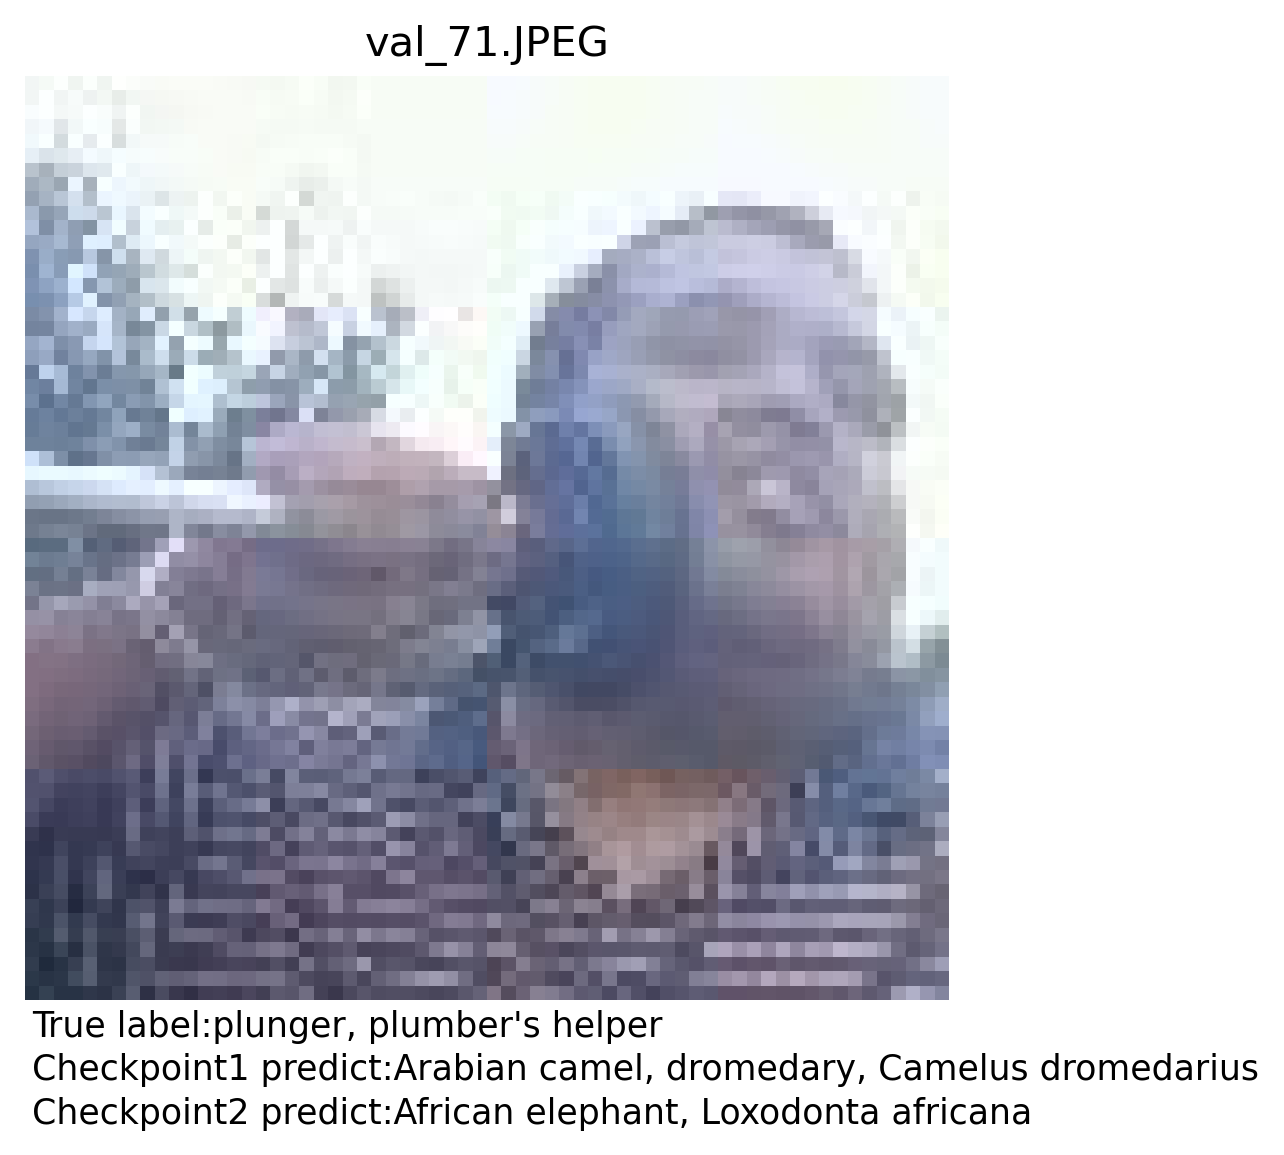

In [38]:
idx = 10
test = open_img(differ_idx[idx], img_names)
plt.figure(dpi=250)
plt.imshow(test)
plt.text(0, 6+60, 'True label:'+true_objs[idx])
plt.text(0, 10+59, 'Checkpoint1 predict:'+tar1_objs[idx])
plt.text(0, 15+57, 'Checkpoint2 predict:'+tar2_objs[idx])
plt.title(img_names[differ_idx[idx]])
plt.axis('off')
# plt.savefig('./results/'+img_names[differ_idx[idx]])
plt.show()